<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-&amp;-A/B-Testing-Analysis" data-toc-modified-id="EDA-&amp;-A/B-Testing-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA &amp; A/B Testing Analysis</a></span><ul class="toc-item"><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Initial-Data-Analysis" data-toc-modified-id="Initial-Data-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Initial Data Analysis</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Dates-Plot" data-toc-modified-id="Dates-Plot-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Dates Plot</a></span></li><li><span><a href="#Hour-Histogram" data-toc-modified-id="Hour-Histogram-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Hour Histogram</a></span></li><li><span><a href="#Browser-Word-Cloud" data-toc-modified-id="Browser-Word-Cloud-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Browser Word Cloud</a></span></li><li><span><a href="#Device-Make-Word-Cloud" data-toc-modified-id="Device-Make-Word-Cloud-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Device Make Word Cloud</a></span></li></ul></li><li><span><a href="#Statistical-Tests-&amp;-Analysis" data-toc-modified-id="Statistical-Tests-&amp;-Analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Statistical Tests &amp; Analysis</a></span><ul class="toc-item"><li><span><a href="#Fisher's-Exact-Test" data-toc-modified-id="Fisher's-Exact-Test-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Fisher's Exact Test</a></span></li><li><span><a href="#Phi-Coefficient-of-Association" data-toc-modified-id="Phi-Coefficient-of-Association-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Phi Coefficient of Association</a></span></li><li><span><a href="#Ratios-of-Respondents-to-total-&amp;-Exposed-to-Control" data-toc-modified-id="Ratios-of-Respondents-to-total-&amp;-Exposed-to-Control-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Ratios of Respondents to total &amp; Exposed to Control</a></span></li></ul></li><li><span><a href="#Conclusion(s)" data-toc-modified-id="Conclusion(s)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion(s)</a></span></li></ul></li></ul></div>

# EDA & A/B Testing Analysis

To:&nbsp;&nbsp;&nbsp;&nbsp; Magnimind

From: Matt Curcio, matt.curcio.ri@gmail.com

Date: 2022-10-30

Re:&nbsp;&nbsp;&nbsp; Ad AB Testing



## Executive Summary

>*Note: This report describes work for the mythical company, catsVSdogs.com.*

1. This A/B Test was carried out between July 3-10, 2020, Friday to Friday with 1243 participants.

| Ratio Data | Proportion |
|:------|-----------:|
| Participants vs Total Impressions Ratio | 1243 / 8077 = 15.4% |
| Control: Conversion-Ratio using Cat icon | 322 / 586 = 54.9% |
| Exposed: Conversion-Ratio using Dog icon | 349 / 657 = 53.1% |

2. Market research showed that using animal icons on the purchase page of www.catsVSdogs.com might promote a higher conversion rate, i.e. better sales. The cat and the dog icons were chosen for AB testing.

| ![small-cat](small-cat.jpeg) | ![small-dog](small-dog.jpeg) |
|:-------:|:-------:|
| Control | Exposed |

<b><center>Order Icon: Cat vs. Dog</center></b>


3. Exploratory data analysis found two potential problems. 


4. Instead of using the more common z-test, I chose to use [Fisher's Exact Test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test) and the [Phi-Coefficient test](https://en.wikipedia.org/wiki/Phi_coefficient). 


**Conclusions**


1. **No changes to www.catsVSdogs.com should be made at this time.**


2. The 247% greater traffic on 7/3/2020 versus 7/10/2020, as shown on the [Date Plot](#date-plot), may need further investigation.


3. The 564% greater traffic on hr=15:00 versus the mean=336, as shown on the [Hour Histogram](#Hour-Histogram), may need further investigation.


4. [Fisher's Exact Test](#Fisher's-Exact-Test) (P-value = 0.531) suggests there is no association between the two icons and any change of conversion rates.


5. [Phi Coefficient](#Phi-Coefficient-of-Association) ($\Phi = -0.0183$) states there is no relationship between the two icons and any change of conversion rates.

---

##  Initial Data Analysis

- Data can be found at: [ad-ab-testing](https://www.kaggle.com/datasets/osuolaleemmanuel/ad-ab-testing).

In [1]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy.stats import norm
import scipy.stats as stats
%matplotlib inline


zip_file = "archive.zip"

try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
        print("Extracted all")
except:
    print("Zip file corrupt")

Zip file corrupt


In [2]:
!ls

 2022-10-28-MCurcio-AB-Testing.ipynb   notes	        small-dog.jpeg
'AdSmartABdata - AdSmartABdata.csv'    small-cat.jpeg


In [3]:
filename = "AdSmartABdata - AdSmartABdata.csv"
df = pd.read_csv(filename)

print('\nDataframe dimensions: ',
      df.shape[0], 'Observations &', df.shape[1], 'features')

df.head(5)


Dataframe dimensions:  8077 Observations & 9 features


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
# Check for NULLS: NO NULLS FOUND
df.isnull().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [5]:
# Check for NAS: NO NAS FOUND
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [6]:
# .info() provides dataframe size, No. of observations, 
# column names, data type and Non-null count

df_mod = df.drop(df.columns[[0, 5]], axis=1, inplace=False)
df_mod.info() # df_modified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   experiment   8077 non-null   object
 1   date         8077 non-null   object
 2   hour         8077 non-null   int64 
 3   device_make  8077 non-null   object
 4   browser      8077 non-null   object
 5   yes          8077 non-null   int64 
 6   no           8077 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 441.8+ KB


In [7]:
df_mod.head(5)

,experiment,date,hour,device_make,browser,yes,no
0,exposed,2020-07-10,8,Generic Smartphone,Chrome Mobile,0,0
1,exposed,2020-07-07,10,Generic Smartphone,Chrome Mobile,0,0
2,exposed,2020-07-05,2,E5823,Chrome Mobile WebView,0,1
3,control,2020-07-03,15,Samsung SM-A705FN,Facebook,0,0
4,control,2020-07-03,15,Generic Smartphone,Chrome Mobile,0,0


**Note 1**

- Data did not contain any missing values, therefore all 8077 observations were kept.

- The `archive.zip` file has NO descriptive information on the columns `auction_id` and `platform_os` columns. These variable will not be used in this analysis.

---


## Exploratory Data Analysis

### Dates Plot

In [8]:
# Experiment Dates
# Group by date
df_dates = df_mod.groupby('date')['date'].count()
print(df_dates)
type(df_dates)

date
2020-07-03    2015
2020-07-04     903
2020-07-05     890
2020-07-06     490
2020-07-07     480
2020-07-08    1198
2020-07-09    1208
2020-07-10     893
Name: date, dtype: int64


pandas.core.series.Series

**Note 2**

- The experiment was run between `July 3-10, 2020, (Friday to Friday)`

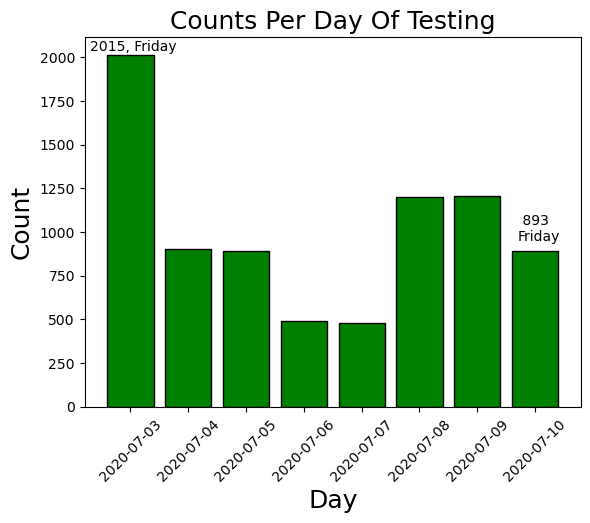

In [9]:
# Barplot of dates

df_date = {'Date': ['2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10'],
           'Counts': [2015, 903, 890, 490, 480, 1198, 1208, 893]}

plt.bar(df_date['Date'], df_date['Counts'], color='green', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Counts Per Day Of Testing', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.text(-0.7, 2040, "2015, Friday")
plt.text(6.7, 950, " 893\nFriday")
plt.show()

**Note 3**

- Friday, July 3rd, 2020 traffic = 2015 impressions
- Friday, July 10th, 2020 traffic = 815 impressions.
- The 247% greater traffic on 7/3 versus 7/10 may need to be further investigated.

---

### Hour Histogram

In [10]:
# Experiment Hour
# Group by Hour
df_hour = df_mod.groupby('hour')['hour'].count()
print(df_hour)
type(df_hour)
print('\nMean over 24 hours =', df_hour.mean())

hour
0      194
1      222
2      230
3      266
4      281
5      302
6      327
7      381
8      394
9      346
10     336
11     282
12     278
13     290
14     319
15    1895
16     335
17     263
18     273
19     227
20     264
21     206
22     135
23      31
Name: hour, dtype: int64

Mean over 24 hours = 336.5416666666667


Text(0, 0.07, 'Mean = 336 Impressions / hr')

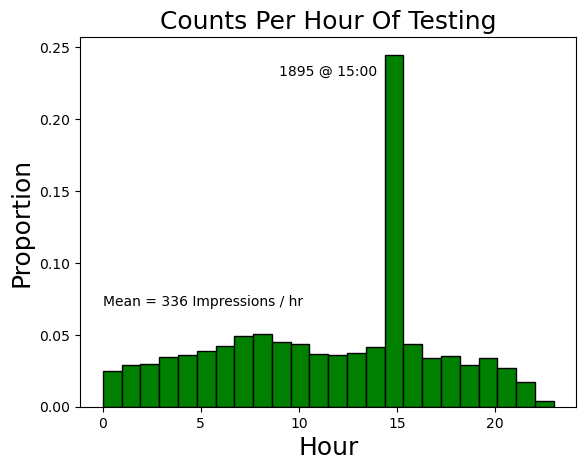

In [11]:
# Histogram of Hours Vs Counts
df_hour = df_mod['hour']
df_hour.plot(kind='hist', color='green',
             density=True, edgecolor='black', bins=24)
plt.title('Counts Per Hour Of Testing', fontsize=18)
plt.xlabel('Hour', fontsize=18)
plt.ylabel('Proportion', fontsize=18)
plt.text(9, 0.23, "1895 @ 15:00")
plt.text(0, 0.07, "Mean = 336 Impressions / hr")

**Note 4**

- 1895 impressions were collected at hour 15.
- The mean of 24 hours is 336 impressions.
- The **564%** greater traffic on **hr=1500** versus the **mean=336** may need to be further investigated.

---

### Browser Word Cloud

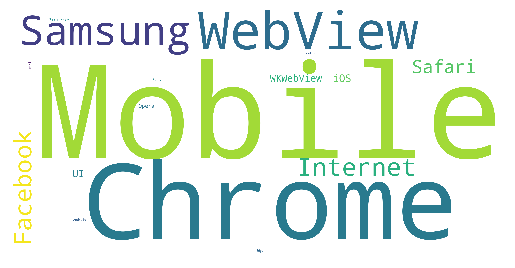

In [12]:
# Word Cloud for browser

# Create text variable
text1 = " ".join(browser for browser in df_mod.browser)  # Change df_a.browser

# Creatd word_cloud using **.generate()** method
word_cloud1 = WordCloud(collocations=False, background_color='white',
                        width=3000, height=1500).generate(text1)
# Saveg image
word_cloud1.to_file('browser_wordcloud.png')

# Display Word Cloud
plt.imshow(word_cloud1, interpolation='none')
plt.axis("off")
plt.show()

---

### Device Make Word Cloud

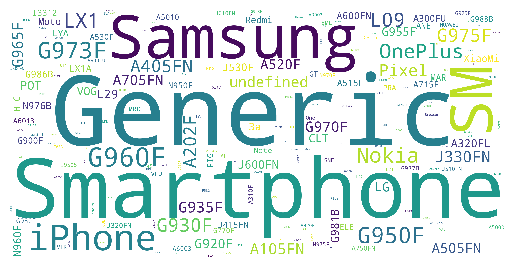

In [13]:
# Word Cloud for device_make

# Create the text variable
text1 = " ".join(device_make for device_make in df_mod.device_make)

# Create word_cloud using **.generate()** method

word_cloud1 = WordCloud(collocations=False, background_color='white',
                        width=3000, height=1500).generate(text1)
# Saveg image
word_cloud1.to_file('device_wordcloud.png')

# Display Word Cloud
plt.imshow(word_cloud1, interpolation='none')
plt.axis("off")
plt.show()


---

## Statistical Tests & Analysis

### Fisher's Exact Test

Fisher's Exact Test is a Non-Parametric test. In plain English, Fisher's test does not make the same assumptions as the z-test for example. Fisher's test assumes:

1. Random sampling
2. Independence
3. Mutually exclusive groups

It is appropriate to use Fisher's Exact Test in the following scenario:

- Variables are categorical and the result is classified in two different groups.
- One is looking for the relationship between two variables.
- The response variables are recorded using counts.

Fisher’s Exact Test uses the hypotheses test:

- H0: The two variables are independent.
- H1: The two variables are not independent, 
  - i.e. the variables depend on each other.

In [14]:
# KEEP 'PARTICIPATING' MEMBERS ONLY
# Where 'yes' or 'no' columns are equal to 1.

# REMOVE columns [[0,2,3,4,5,6]] from ORIGINAL dataframe, **df**
df_mod = df.drop(df.columns[[0,2,3,4,5,6]], axis=1, inplace=False)

# KEEP PARTICIPATING MEMBERS ONLY

df_participants = df_mod[(df_mod['yes'] == 1) | (df_mod['no'] == 1)]
print('\nDimensions of Participants dataframe =', df_participants.shape)

df_participants.head(5)


Dimensions of Participants dataframe = (1243, 3)


,experiment,yes,no
2,exposed,0,1
16,exposed,1,0
20,exposed,0,1
23,control,1,0
27,control,0,1


In [15]:
fishers_a = df_participants[(df_participants['experiment'] == 'control') & 
                            (df_participants['no'] == 0)].count()

fishers_b = df_participants[(df_participants['experiment'] == 'control') & 
                            (df_participants['no'] == 1)].count()

fishers_c = df_participants[(df_participants['experiment'] == 'exposed') & 
                            (df_participants['no'] == 0)].count()

fishers_d = df_participants[(df_participants['experiment'] == 'exposed') & 
                            (df_participants['no'] == 1)].count()

In [16]:
df_participants['experiment'].value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

In [17]:
# Fisher 2x2 Contingency Table

print('fishers_a =', fishers_a[0])
print('fishers_b =', fishers_b[0])
print('fishers_c =', fishers_c[0])
print('fishers_d =', fishers_d[0])

fishers_a = 264
fishers_b = 322
fishers_c = 308
fishers_d = 349


In [18]:
df = pd.DataFrame({'No': [264, 308], 'Yes': [322, 349]},
                  index=pd.Index(['Control', 'Exposed']))
df

,No,Yes
Control,264,322
Exposed,308,349


In [19]:
# Proportions Table

df_prop = pd.DataFrame({'No': [0.212, 0.248], 'Yes': [0.259, 0.281]},
                       index=pd.Index(['Control', 'Exposed']))
df_prop

,No,Yes
Control,0.212,0.259
Exposed,0.248,0.281


In [20]:
# Fishers exact test on the data

odds_ratio, p_value = stats.fisher_exact(df, alternative="two-sided")
print("\nOdds ratio is: " + str(odds_ratio))
print("\nP-value is: " + str(p_value))


Odds ratio is: 0.9290150842945873

P-value is: 0.5309716576386057


**Results of Fisher's Exact Test**

- P-value = 0.531, therefore we CANNOT REJECT H0. The two variables are independent.


- Simply, there is no association between the two icons and the conversion rates.


- Fisher's test also produces an odds ratio for betting people. This aspect shows that the odds of increasing the conversion rates are 0.93 : 1.0. 
  - **Basically, the odds of increasing sales is 1:1, no change**.
  
---


### Phi Coefficient of Association

The Phi Coefficient of Association ($\large \Phi$) is a measure of the degree of association (cooperative effect) between two binary variables.  

The Phi Coefficient test can be interpreted similarly to Pearson's correlation coefficient. Chiefly, does any change in conversion rate positively (or negatively) correlate with changing the two icons?


- H0: There IS NO statistically significant relationship between the change in conversion rate and changing the cat and dog icons.
- H1: There IS a statistically significant relationship between the two variables.

It is appropriate to use Phi in the following scenario:

1. To determine the relationship between two variables


2. The variables of interest are binary


3. There are only two variables


$$\large \Phi = \frac{a \cdot d - b \cdot c}{\sqrt{efgh}}$$ 

Where: 

| Experiment |       NO |     YES |    Sums |
|-----------:|---------:|--------:|--------:|
| Control    |  a = 264 | b = 322 | e = 586 |
| Exposed    |  c = 308 | d = 349 | f = 657 |
| Sums       |  g = 572 | h = 671 |    1243 |

In [21]:
import math 

numerator = (264 * 349)-(308 * 322)

denomonator = ((586)*(657)*(572)*(671))**(0.5)

print('\nThe numerator of Phi =', numerator)
print('\nThe denomenator of Phi =', math.floor(denomonator))
print('\nPhi Coefficient =', numerator/denomonator)


The numerator of Phi = -7040

The denomenator of Phi = 384406

Phi Coefficient = -0.018313944421528762


**Results of Phi Coefficient of Association**

$$\large \Phi = \frac{-7,040}{384,406} = -0.0183$$

The Phi Coefficient takes on values between -1 and 1 where:
- -1 indicates a perfectly negative relationship between the two variables.
- 0 indicates no association between the two variables.
- 1 indicates a perfectly positive relationship between the two variables.

---

- In general, the closer the Phi Coefficient is to zero, there is little or no relationship between the two variables.

- In this circumstance, H0 should be chosen. There is no association between changing the icons and the change in the conversion rate.

---


### Ratios of Respondents to total & Exposed to Control

**Conversion Rate**: Conversion rate, defined as the proportion of sessions ending up with a transaction.

$$\text{Conversion Rate} = 100\% \cdot \frac{\text{# of converted}}{\text{# of converted + # of not converted}}$$


| Experiment |       NO |     YES |    Sums |
|-----------:|---------:|--------:|--------:|
| Control    |  a = 264 | b = 322 | e = 586 |
| Exposed    |  c = 308 | d = 349 | f = 657 |
| Sums       |  g = 572 | h = 671 |    1243 |

In [22]:
1243/8077, 322/586, 349/657

(0.15389377244026248, 0.5494880546075085, 0.5312024353120244)

| Class | Proportion |
|:------|-----------:|
| Participants vs Total Impressions ratio | 15.4% |
| Control: Conversion-Ratio of Cat-people | 54.9% |
| Exposed: Conversion-Ratio of Dog-people | 53.1% |

---

## Conclusion(s)

1. The **247% greater traffic on 7/3/2020 versus 7/10/2020**, as seen on the Date plot, could be a problem and may need to be further investigated.


2. The **564% greater traffic on hr=1500 versus the mean=336**, as seen on the Hour histogram, could be a serious problem and may need to be investigated.


3. Fisher's Exact Test (P-value = 0.531) suggests there is no association between the two icons and any change of conversion rates.


4. Phi Coefficient of Association ($\Phi$ = -0.0183) suggests there is no relationship between the two icons and any change of conversion rates.


5. No changes to www.catsVSdogs.com should be made at this time.